In [10]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils_ccd import get_connection

conn = get_connection()
conn_processo = get_connection()

In [20]:
sql_processos = """ SELECT DISTINCT p.IdProcesso as id, p.numero_processo, 
	p.ano_processo,
	pm.Descricao as marcador
FROM processo.dbo.Processos p 
    LEFT JOIN processo.dbo.Itens_Lote i ON p.IdProcesso = i.IdProcesso
    LEFT JOIN processo.dbo.Lotes l ON i.IdLote = l.IdLote
    LEFT JOIN processo.dbo.Pro_MarcadorProcesso pmp ON p.IdProcesso = pmp.IdProcesso 
    LEFT JOIN processo.dbo.Pro_Marcador pm ON pmp.IdMarcador = pm.IdMarcador
    WHERE l.origem = 'DIP'
    ORDER BY  p.IdProcesso
    """

In [21]:
df_processos = pd.read_sql(sql_processos, get_connection())

/tmp/ipykernel_257785/2926778259.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_processos = pd.read_sql(sql_processos, get_connection())


In [22]:
df_processos.fillna('Sem marcador', inplace=True)

/tmp/ipykernel_257785/984083368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='id', y='marcador', data=df_processos, palette='viridis')


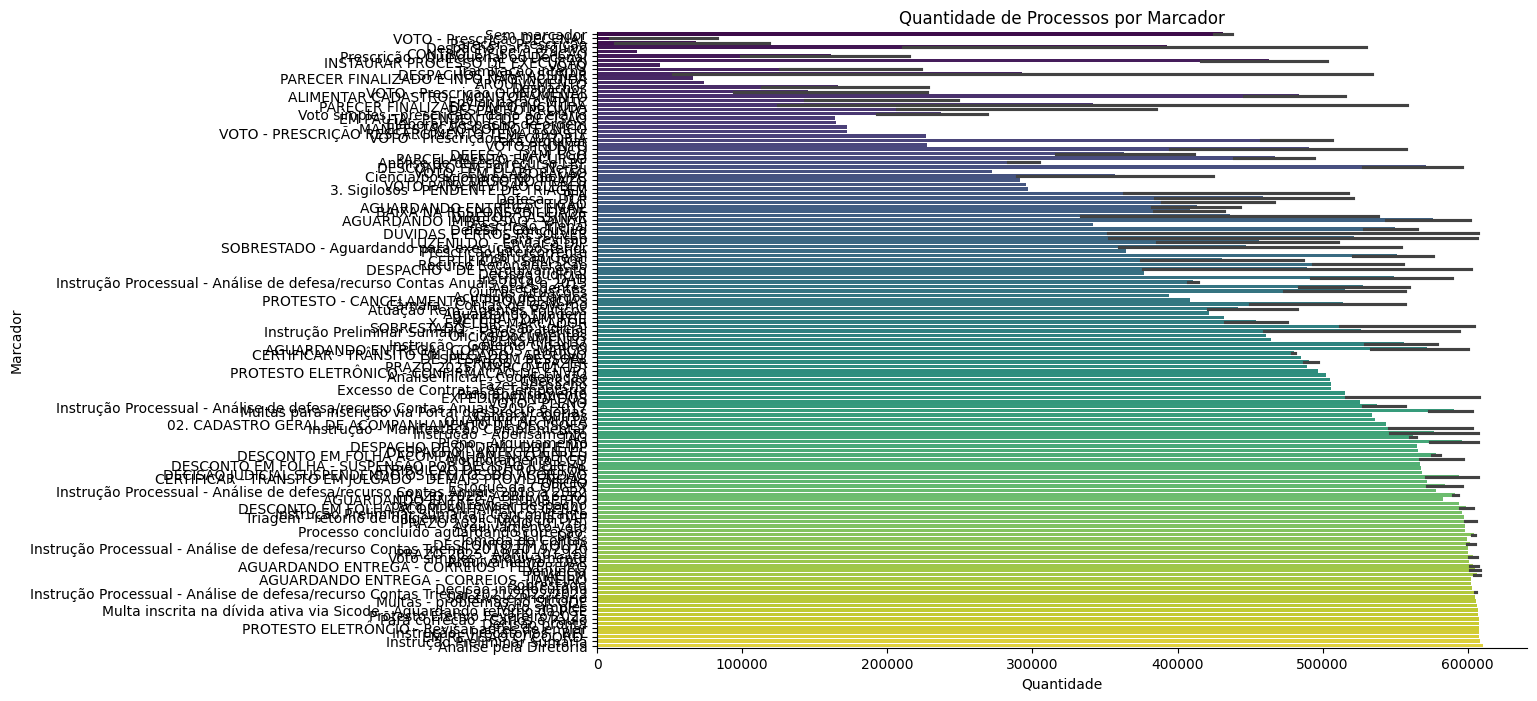

In [23]:
plt.figure(figsize=(12, 8))
sns.barplot(x='id', y='marcador', data=df_processos, palette='viridis')
plt.title('Quantidade de Processos por Marcador')
plt.xlabel('Quantidade')
plt.ylabel('Marcador')
sns.despine(top=True, right=True)
plt.show()

In [24]:
len(df_processos.marcador.unique())

139

In [26]:
df_processos.marcador.unique()

array(['Sem marcador', 'VOTO - Prescrição DECENAL',
       'Parecer - Prescrição', 'Despacho para arquivo',
       'CONTROLE/FISCALIZAÇÃO', 'Prescrição - Quinquenal ou Decenal',
       'INSTAURAR PROCESSO DE EXECUÇÃO', 'VOTO', 'Tramitação interna',
       'DESPACHOS PARA ASSINAR', 'PARECER FINALIZADO E INFO NÃO INCLUÍDA',
       'ARQUIVAMENTO', 'Despachos', 'VOTO - Prescrição QUINQUENAL',
       'ALIMENTAR CADASTRO - MONITORAMENTO', 'Enviar para o MPJTC',
       'PARECER FINALIZADO / INFO INCLUÍDA', 'DESPACHO PRONTO',
       'Voto simples - prescrição - dano ao erário',
       'EM PAUTA - PENDENTE DE DECISÃO', 'Elaborar despacho de ordem',
       'MANIFESTAÇÃO CORPO TÉCNICO',
       'VOTO - PRESCRIÇÃO RESSARCIMENTO TEMA 899 STF',
       'VOTO - Prescrição EXECUTÓRIA', 'Para Arquivar', 'VOTO PRONTO',
       '31 II DCD', 'DEFESA - DAM_FGO', 'PARCELAMENTO EM CURSO',
       'Análise de defesa/recurso LRF', 'DESCONTO EM FOLHA - Nereu',
       'VOTO - EM ELABORAÇÃO', 'Ciência/posicionamento 